## Feature Selection

- 가장 적합한 특성을 선택하는 방법
- 통계 기반으로 잘라내기
- 한 개씩 줄여가면서 성능이 좋은 것을 선택하기
- 모델 기반으로 선택하기
- 필요없는 feature 지우기

- 모든 feature 들이 반드시 모델 학습에 필요치 않음
- 어떤 feature들은 성능을 오히려 나쁘게 함
- 너무 많은 feature은 overfitting의 원인
- 모델에 따라서 필요한 feature을 선택
- 필요없는 feature 제거 -> 학습 속도와 성능
- 다양한 기법과 코드에 대해 공부해야함

## Feature 선택시 주의 사항들

- prediction time에도 쓸 수 있는 feature 인가?
  - ex) 7시간 후의 온도를 예측하는 모델을 만들었는데, 3시간 후의 습도를 가지고 예측하는 모델이라면 이 feature은 사용 불가. 3시간 후의 습도는 실제로 측정할 수 없기 때문.
- 실시간 예측이 필요한 경우인데, 생성이 너무 고비용인 경우
- scale이 일정한가? 또는 비율적으로 표현 가능한가?
  - ex) scaling의 최대치를 7로 설정했는데, 7이 넘는 경우에 어떻게 처리할 것인지
- 새롭게 등장하는 category data에 대한 처리
- 너무 극단적인 분포는 threshold 기반으로 outlier 잘라내기

## 삭제해야 하는 Feature들

- correlation이 너무 높은 feature은 삭제
  - ex) A와 B를 통해 y를 예측하는데, A와 B의 상관관계가 매우 높다면 둘 중 하나는 삭제해주는 것이 좋음. y가 A와 B중 어떤 것으로 예측해야할지 헷갈리는 상황 발생할수도
- 전처리가 완료된 str feature들
- ID와 같은 성향을 가진 Feature들 
  - titanic에서 Passanger Id

## 데이터의 정리가 끝나면 학습하는 방법

- 적합한 모델을 선정한다.
- 모델에 적합한 하이퍼 파라미터를 선정한다.
- 다양한 전처리 경우의 수를 입력한다.
- 학습을 실행한다.
- 성능을 평가한다.

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [268]:
import os
DATA_DIR = './titanic'
data_files = reversed([os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)])
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))
df = pd.concat(df_list, sort=False)
df = df.reset_index(drop=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [269]:
number_of_train_dataset = df['Survived'].notnull().sum()  # train data의 개수
number_of_test_dataset = df['Survived'].isnull().sum()  # test data의 개수
y_true = df.pop('Survived')[:number_of_train_dataset]  # train data까지 슬라이싱

In [270]:
df.loc[61, 'Embarked'] = 'S'
df.loc[829, 'Embarked'] = 'S'

In [271]:
def merge_and_get(ldf, rdf, on, how='inner', index=None):
    if index is True:
        return pd.merge(ldf, rdf, how=how, left_index=True, right_index=True)
    else:
        return pd.merge(ldf, rdf, how=how, on=on)

In [272]:
def merge_and_get(ldf, rdf, on, how='inner', index=None):
    if index is True:
        return pd.merge(ldf, rdf, how=how, left_index=True, right_index=True)
    else:
        return pd.merge(ldf, rdf, how=how, on=on)

In [273]:
sex_dummies = pd.get_dummies(df[['Sex']])
pclass_dummies = pd.get_dummies(df['Pclass'], prefix='Pclass')
embarked_dummies = pd.get_dummies(df[['Embarked']])

In [274]:
one_hot_df = merge_and_get(df, sex_dummies, on=None, index=True)
one_hot_df = merge_and_get(one_hot_df, pclass_dummies, on=None, index=True)
one_hot_df = merge_and_get(one_hot_df, embarked_dummies, on=None, index=True)

In [275]:
temp_columns = ['Sex', 'Pclass', 'Embarked']
# Sex와 Pclass 간의 관계를 찾기 위함.
one_hot_df['Sex-Pclass'] = df['Sex'].map(str)+df['Pclass'].map(str)
one_hot_df['Embarked-Pclass'] = df['Embarked'].map(str)+df['Pclass'].map(str)

one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(one_hot_df['Sex-Pclass'], prefix="SexPclass"), on=None, index=True)
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(one_hot_df['Embarked-Pclass'], prefix="EmbarkedPclass"), on=None, index=True)
one_hot_df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,SexPclass_male3,EmbarkedPclass_C1,EmbarkedPclass_C2,EmbarkedPclass_C3,EmbarkedPclass_Q1,EmbarkedPclass_Q2,EmbarkedPclass_Q3,EmbarkedPclass_S1,EmbarkedPclass_S2,EmbarkedPclass_S3
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,1,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,0,1,0,0,0,0,0,0,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,0,1,0,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,...,1,0,0,0,0,0,0,0,0,1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,0,1,0,0,0,0,0,0,0,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,1,0,0,0,0,0,0,0,0,1
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,...,1,0,0,0,0,0,0,0,0,1


In [276]:
numeric_columns = ['Age', 'SibSp', 'Parch', 'Fare']

In [277]:
log_one_hot_df = merge_and_get(one_hot_df, np.log10(one_hot_df['Fare'] + 0.5), on=None, index=True)
log_one_hot_df.rename(columns={'Fare_x' : 'Fare', 'Fare_y': 'log_fare'}, inplace=True)
log_one_hot_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,EmbarkedPclass_C1,EmbarkedPclass_C2,EmbarkedPclass_C3,EmbarkedPclass_Q1,EmbarkedPclass_Q2,EmbarkedPclass_Q3,EmbarkedPclass_S1,EmbarkedPclass_S2,EmbarkedPclass_S3,log_fare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,0,0,0,0,0,0,1,0.889302
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,1,0,0,0,0,0,0,0,0,1.856023
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,0,0,0,1,0.925570
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,1,0,0,1.729165
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0.931966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0.931966
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,1,0,0,0,0,0,0,0,0,2.039017
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,0,0,0,0,0,0,0,0,1,0.889302
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0.931966


In [278]:
object_columns = ['PassengerId', 'Pclass', 'Name', 'Sex', "Ticket", 'Cabin', 'Embarked']

In [279]:
from collections import Counter
Counter((log_one_hot_df['Name'].str.lower() + " ").sum().split()).most_common(3)

[('mr.', 757), ('miss.', 260), ('mrs.', 197)]

In [280]:
log_one_hot_df['is_mr'] =log_one_hot_df['Name'].str.lower().str.contains(pat='mr.')
log_one_hot_df['is_miss'] =log_one_hot_df['Name'].str.lower().str.contains(pat='miss.')
log_one_hot_df['is_mrs'] =log_one_hot_df['Name'].str.lower().str.contains(pat='mrs.')

In [281]:
# 티켓 문자열 분리
log_one_hot_df['Ticket'].str.rsplit(expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
1304,A.5.,3236,None
1305,PC,17758,None
1306,SOTON/O.Q.,3101262,None
1307,359309,None,None


In [282]:
# 티켓에서 숫자 정보만 추출하기
log_one_hot_df['Ticket'].str.extractall('(\d+)')

0
     match         
0    0            5
     1        21171
1    0        17599
2    0            2
     1      3101282
...             ...
1304 1         3236
1305 0        17758
1306 0      3101262
1307 0       359309
1308 0         2668

[1373 rows x 1 columns]

In [283]:
log_one_hot_df['is_pc'] = log_one_hot_df['Ticket'].str.lower().str.contains(pat= 'pc')
log_one_hot_df['is_ca'] = log_one_hot_df['Ticket'].str.lower().str.contains(pat= 'c.a.')
log_one_hot_df['is_paris'] = log_one_hot_df['Ticket'].str.lower().str.contains(pat= 'paris')
log_one_hot_df['is_soton'] = log_one_hot_df['Ticket'].str.lower().str.contains(pat= 'soton')
log_one_hot_df['is_ston'] = log_one_hot_df['Ticket'].str.lower().str.contains(pat= 'ston')
log_one_hot_df['is_so'] = log_one_hot_df['Ticket'].str.lower().str.contains(pat= 's.o')

In [284]:
test = log_one_hot_df['Cabin'].fillna('99999')
Counter((test.str.lower() + " ").sum().split()).most_common(30)

[('99999', 1014),
 ('f', 8),
 ('c23', 6),
 ('c25', 6),
 ('c27', 6),
 ('g6', 5),
 ('b57', 5),
 ('b59', 5),
 ('b63', 5),
 ('b66', 5),
 ('f33', 4),
 ('f2', 4),
 ('f4', 4),
 ('c78', 4),
 ('d', 4),
 ('c22', 4),
 ('c26', 4),
 ('b96', 4),
 ('b98', 4),
 ('e46', 3),
 ('b58', 3),
 ('b60', 3),
 ('e101', 3),
 ('e34', 3),
 ('a34', 3),
 ('c101', 3),
 ('b51', 3),
 ('b53', 3),
 ('b55', 3),
 ('c85', 2)]

In [285]:
log_one_hot_df["is_cabin_a"] = test.str.contains(pat= 'a')
log_one_hot_df["is_cabin_b"] = test.str.contains(pat= 'b')
log_one_hot_df["is_cabin_c"] = test.str.contains(pat= 'c')
log_one_hot_df["is_cabin_d"] = test.str.contains(pat= 'd')
log_one_hot_df["is_cabin_e"] = test.str.contains(pat= 'e')
log_one_hot_df["is_cabin_f"] = test.str.contains(pat= 'f')
log_one_hot_df["is_cabin_g"] = test.str.contains(pat= 'g')

In [286]:
def count_cabin(x):
    if type(x) is int:
        return 0
    else:
        return len(x)

log_one_hot_df['number_of_Cabin'] = log_one_hot_df['Cabin'].str.split(" ").fillna(0).map(count_cabin)
log_one_hot_df['log_number_of_Cabin'] = np.log(log_one_hot_df['number_of_Cabin'] + 0.01)

In [287]:
len(log_one_hot_df.columns)

55

## Feature Elimination

In [288]:
all_df = log_one_hot_df.copy(deep=True)

In [289]:
elimination_features = ['PassengerId' ,'Name', 'Cabin', 'Ticket']
for col_name in elimination_features:
    all_df.drop(col_name, axis=1, inplace=True)

In [290]:
len(all_df.columns)

51

In [291]:
del all_df['Sex-Pclass']
del all_df['Embarked-Pclass']

In [292]:
del all_df['Sex']

In [293]:
del all_df['Pclass']
del all_df['Embarked']

In [294]:
len(all_df.columns)

46

In [295]:
all_df['Fare'].fillna(all_df['Fare'].mean(), inplace=True)

In [296]:
all_df.isnull().sum()

Age                    263
SibSp                    0
Parch                    0
Fare                     0
Sex_female               0
Sex_male                 0
Pclass_1                 0
Pclass_2                 0
Pclass_3                 0
Embarked_C               0
Embarked_Q               0
Embarked_S               0
SexPclass_female1        0
SexPclass_female2        0
SexPclass_female3        0
SexPclass_male1          0
SexPclass_male2          0
SexPclass_male3          0
EmbarkedPclass_C1        0
EmbarkedPclass_C2        0
EmbarkedPclass_C3        0
EmbarkedPclass_Q1        0
EmbarkedPclass_Q2        0
EmbarkedPclass_Q3        0
EmbarkedPclass_S1        0
EmbarkedPclass_S2        0
EmbarkedPclass_S3        0
log_fare                 1
is_mr                    0
is_miss                  0
is_mrs                   0
is_pc                    0
is_ca                    0
is_paris                 0
is_soton                 0
is_ston                  0
is_so                    0
i

/var/folders/w3/8l1p0j1d51s69f3vlw1939ym0000gn/T/ipykernel_62280/4169939957.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_df['Age'], bins=10)


<AxesSubplot: xlabel='Age', ylabel='Density'>

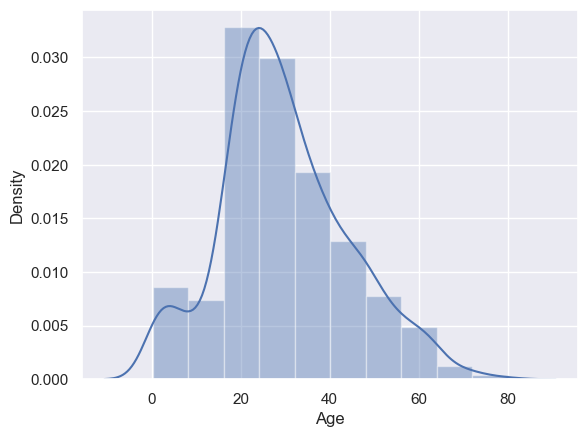

In [297]:
sns.distplot(all_df['Age'], bins=10)

In [298]:
all_df.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SexPclass_female1', 'SexPclass_female2', 'SexPclass_female3',
       'SexPclass_male1', 'SexPclass_male2', 'SexPclass_male3',
       'EmbarkedPclass_C1', 'EmbarkedPclass_C2', 'EmbarkedPclass_C3',
       'EmbarkedPclass_Q1', 'EmbarkedPclass_Q2', 'EmbarkedPclass_Q3',
       'EmbarkedPclass_S1', 'EmbarkedPclass_S2', 'EmbarkedPclass_S3',
       'log_fare', 'is_mr', 'is_miss', 'is_mrs', 'is_pc', 'is_ca', 'is_paris',
       'is_soton', 'is_ston', 'is_so', 'is_cabin_a', 'is_cabin_b',
       'is_cabin_c', 'is_cabin_d', 'is_cabin_e', 'is_cabin_f', 'is_cabin_g',
       'number_of_Cabin', 'log_number_of_Cabin'],
      dtype='object')

In [301]:
all_df['Age'] = all_df['Age'].fillna(all_df['Age'].mean())

In [303]:
all_df.isnull().sum()

Age                    0
SibSp                  0
Parch                  0
Fare                   0
Sex_female             0
Sex_male               0
Pclass_1               0
Pclass_2               0
Pclass_3               0
Embarked_C             0
Embarked_Q             0
Embarked_S             0
SexPclass_female1      0
SexPclass_female2      0
SexPclass_female3      0
SexPclass_male1        0
SexPclass_male2        0
SexPclass_male3        0
EmbarkedPclass_C1      0
EmbarkedPclass_C2      0
EmbarkedPclass_C3      0
EmbarkedPclass_Q1      0
EmbarkedPclass_Q2      0
EmbarkedPclass_Q3      0
EmbarkedPclass_S1      0
EmbarkedPclass_S2      0
EmbarkedPclass_S3      0
log_fare               1
is_mr                  0
is_miss                0
is_mrs                 0
is_pc                  0
is_ca                  0
is_paris               0
is_soton               0
is_ston                0
is_so                  0
is_cabin_a             0
is_cabin_b             0
is_cabin_c             0


In [304]:
X_train = all_df[:number_of_train_dataset].values
X_test = all_df[number_of_train_dataset:].columns
y_train = y_true.copy()

In [305]:
X_train.shape

(891, 46)

#### sklearn의 REF(Recursive Feature elimination) 을 사용하면 필요 없는 feature을 알아서 삭제시켜준다.

In [307]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

select = RFE(RandomForestClassifier(n_estimators=100))

select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
X_train_selected.shape

(891, 23)

#### 살아남은 column들만 확인하기

In [311]:
all_df.columns[select.get_support()]

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_3', 'Embarked_C', 'Embarked_S', 'SexPclass_female1',
       'SexPclass_female2', 'SexPclass_female3', 'SexPclass_male1',
       'SexPclass_male3', 'EmbarkedPclass_S3', 'log_fare', 'is_mr', 'is_miss',
       'is_mrs', 'is_so', 'number_of_Cabin', 'log_number_of_Cabin'],
      dtype='object')

In [312]:
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=0)